In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import bqm_frustration
import pickle
import os
import copy
import time
import os

In [15]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [16]:
qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [83]:
L = 20
bqm = bqm_frustration(L, 1, 0)

In [84]:
sampleset = sampler.sample(bqm, num_reads=100, 
                           label=f'Plot Ising Frustrato')

In [86]:
col_map = {}
pos = {}
for state, node in zip(sampleset.record[0][0], sampleset.variables):
    if state == 1:
        col_map[node] = [123/255, 180/255, 248/255]
    else:
        col_map[node] = 'white'
    split = node.split('-')
    x, y = int(split[0]), int(split[1])
    pos[node] = (y, -x)

C:\Users\cosmi\AppData\Local\Temp\ipykernel_17128\2245744396.py:4: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use dimod.to_networkx_graph() instead.
  G = bqm.to_networkx_graph()


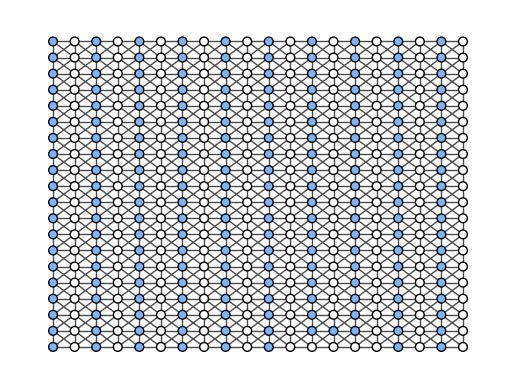

In [94]:
from cProfile import label


G = bqm.to_networkx_graph()

node_col = []
for node in G.nodes:
    node_col.append(col_map[node])

#pos = {f'{x}-{y}':(y,-x) for x in range(L) for y in range(L)}
nx.draw_networkx_nodes(G, pos=pos, node_color=node_col, edgecolors='k', node_size=40)

nx.draw_networkx_edges(G, pos=pos, edge_color=[76/255, 75/255, 75/255])
plt.axis('off')
#plt.savefig('striped_lattice_L20.png', transparent=True, dpi=600)

In [85]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=638239dd-b68c-4805-b60b-b1b43df8bbe4'